In [55]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (Embedding, Dense, SimpleRNN, LSTM, Bidirectional, Flatten, Dropout)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2, l1_l2

In [21]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


<span style="color: Gold"> 1. 데이터로드

In [23]:
ids = movie_reviews.fileids()
reviews = [movie_reviews.raw(id) for id in ids]
categories = [movie_reviews.categories(id)[0] for id in ids]

# 토큰화 및 정수 인코딩
max_word = 10000
tokenizer = Tokenizer(num_words = 10000, oov_token = 'UNK')

tokenizer.fit_on_texts(reviews)
# 텍스트를 시퀀스로 변환
x = tokenizer.texts_to_sequences(reviews)
# 시퀀스 패딩
maxlen = 500
x = pad_sequences(x,maxlen = maxlen, truncating='pre')
# 레이블 변환
label_dict = {'pos' : 1 , 'neg': 0}
y = np.array([label_dict[c] for c in categories])
# 학습 테스트 데이터 분할
x_train,x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=42, test_size=0.2)



<span style="color: Gold"> 2. 세가지 모델 구축, 학습

In [43]:
# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 1 baseline(Flatten + Dense)
model1 = Sequential([
    Embedding(max_word,32,input_length = maxlen),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history1 = model1.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model1.evaluate(x_test,y_test)
results['baseline'] = score1[1]
print(f'model1 정확도:{score1[1]:.4f}')

Epoch 1/10


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.5164 - loss: 0.6926 - val_acc: 0.5625 - val_loss: 0.6865
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9711 - loss: 0.5887 - val_acc: 0.5813 - val_loss: 0.6796
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9828 - loss: 0.4382 - val_acc: 0.5875 - val_loss: 0.6625
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9977 - loss: 0.2604 - val_acc: 0.6062 - val_loss: 0.6448
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9984 - loss: 0.1353 - val_acc: 0.6344 - val_loss: 0.6328
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 1.0000 - loss: 0.0738 - val_acc: 0.6469 - val_loss: 0.6277
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 1.0000 - loss: 0.0446 - val_acc: 0.6562 - val_loss: 0.6252
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 1.0000 - loss: 0.0296 - val_acc: 0.6656 - val_loss: 0.6231
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 1.0000 - loss: 0.

In [44]:
# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 2 (SimpleRnn)
model2 = Sequential([
    Embedding(max_word,32,input_length = maxlen),
    SimpleRNN(32),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history2 = model2.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model2.evaluate(x_test,y_test)
results['Simple_RNN'] = score1[1]
print(f'model2 정확도:{score1[1]:.4f}')

Epoch 1/10


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - acc: 0.5437 - loss: 0.6926 - val_acc: 0.5531 - val_loss: 0.6886
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.5773 - loss: 0.6734 - val_acc: 0.5156 - val_loss: 0.6921
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - acc: 0.8117 - loss: 0.5860 - val_acc: 0.5219 - val_loss: 0.6996
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.9602 - loss: 0.3250 - val_acc: 0.5531 - val_loss: 0.7476
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - acc: 0.9969 - loss: 0.0746 - val_acc: 0.5219 - val_loss: 0.9151
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - acc: 1.0000 - loss: 0.0210 - val_acc: 0.5219 - val_loss: 1.0559
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - acc: 0.9992 - loss: 0.0116 - val_acc: 0.5156 - val_loss: 1.1242
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - acc: 1.0000 - loss: 0.0044 - val_acc: 0.5188 - val_loss: 1.2248
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - acc: 1.0000 - loss: 0.

In [45]:
# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 3 (Bidirectional LSTM)
model3 = Sequential([
    Embedding(max_word,64,input_length = maxlen),
    Bidirectional(LSTM(64)),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history3 = model3.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model3.evaluate(x_test,y_test)
results['Bidirectional LSTM'] = score1[1]
print(f'model3 정확도:{score1[1]:.4f}')

Epoch 1/10


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - acc: 0.5164 - loss: 0.6930 - val_acc: 0.5688 - val_loss: 0.6910
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - acc: 0.6336 - loss: 0.6549 - val_acc: 0.6875 - val_loss: 0.5808
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - acc: 0.8594 - loss: 0.4092 - val_acc: 0.7500 - val_loss: 0.5546
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step - acc: 0.9695 - loss: 0.1099 - val_acc: 0.7250 - val_loss: 0.7079
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 398ms/step - acc: 0.9883 - loss: 0.0338 - val_acc: 0.7469 - val_loss: 0.7337
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 367ms/step - acc: 0.9930 - loss: 0.0265 - val_acc: 0.7094 - val_loss: 0.9591
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 288ms/step - acc: 0.9945 - loss: 0.0292 - val_acc: 0.7406 - val_loss: 0.7929
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - acc: 0.9969 - loss: 0.0171 - val_acc: 0.7406 - val_loss: 0.8550
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - acc:

<span style="color: Gold"> 3. 성능 비교 및 시각화

Bidirectional LSTM : 0.7000


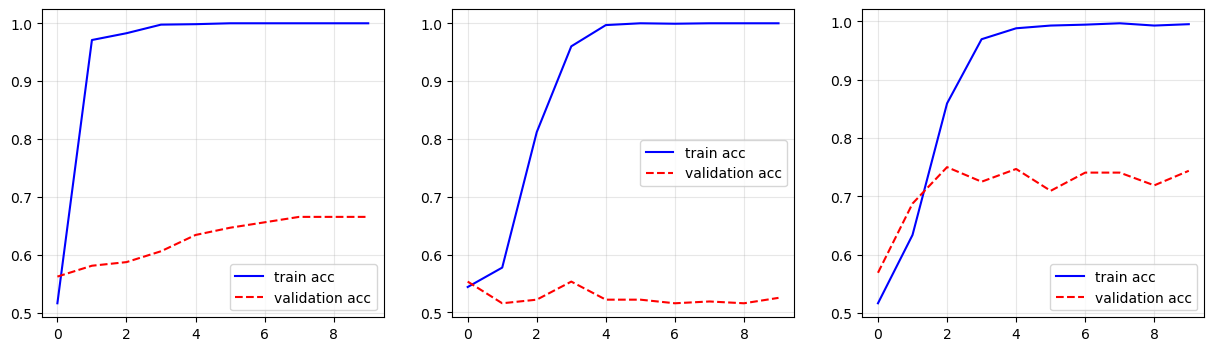

In [49]:
for modelname, acc in sorted(results.items(),key=lambda x : x[1], reverse=True) :
    print(f'{modelname} : {acc:.4f}')
fig, ax = plt.subplots(1,3,figsize=(15,4))
# baseline
ax[0].plot(history.history['acc'],'b-', label='train acc')
ax[0].plot(history.history['val_acc'],'r--', label='validation acc')
ax[0].legend()
ax[0].grid(True,alpha=0.3)
# SimpleRnn
ax[1].plot(history2.history['acc'],'b-', label='train acc')
ax[1].plot(history2.history['val_acc'],'r--', label='validation acc')
ax[1].legend()
ax[1].grid(True,alpha=0.3)
# Bidirection_LSTM
ax[2].plot(history3.history['acc'],'b-', label='train acc')
ax[2].plot(history3.history['val_acc'],'r--', label='validation acc')
ax[2].legend()
ax[2].grid(True,alpha=0.3)


---

성능개선을 위해 세 모델 모두 dropout 시행

In [50]:
# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 1 baseline(Flatten + Dense)
model1 = Sequential([
    Embedding(max_word,32,input_length = maxlen),
    Flatten(),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history1 = model1.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model1.evaluate(x_test,y_test)
results['baseline'] = score1[1]
print(f'model1 정확도:{score1[1]:.4f}')


# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 2 (SimpleRnn)
model2 = Sequential([
    Embedding(max_word,32,input_length = maxlen),
    SimpleRNN(32),
    Dropout(0.5),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history2 = model2.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model2.evaluate(x_test,y_test)
results['Simple_RNN'] = score1[1]
print(f'model2 정확도:{score1[1]:.4f}')


# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 3 (Bidirectional LSTM)
model3 = Sequential([
    Embedding(max_word,64,input_length = maxlen),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history3 = model3.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model3.evaluate(x_test,y_test)
results['Bidirectional LSTM'] = score1[1]
print(f'model3 정확도:{score1[1]:.4f}')

Epoch 1/10


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.5227 - loss: 0.6935 - val_acc: 0.5500 - val_loss: 0.6923
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9055 - loss: 0.6214 - val_acc: 0.5719 - val_loss: 0.6877
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9570 - loss: 0.5363 - val_acc: 0.5938 - val_loss: 0.6792
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9859 - loss: 0.4201 - val_acc: 0.5906 - val_loss: 0.6685
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9945 - loss: 0.2965 - val_acc: 0.6094 - val_loss: 0.6559
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9984 - loss: 0.1952 - val_acc: 0.6062 - val_loss: 0.6432
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 1.0000 - loss: 0.1280 - val_acc: 0.6250 - val_loss: 0.6349
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9992 - loss: 0.0879 - val_acc: 0.6250 - val_loss: 0.6285
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 1.0000 - loss: 0.

Bidirectional LSTM : 0.6850


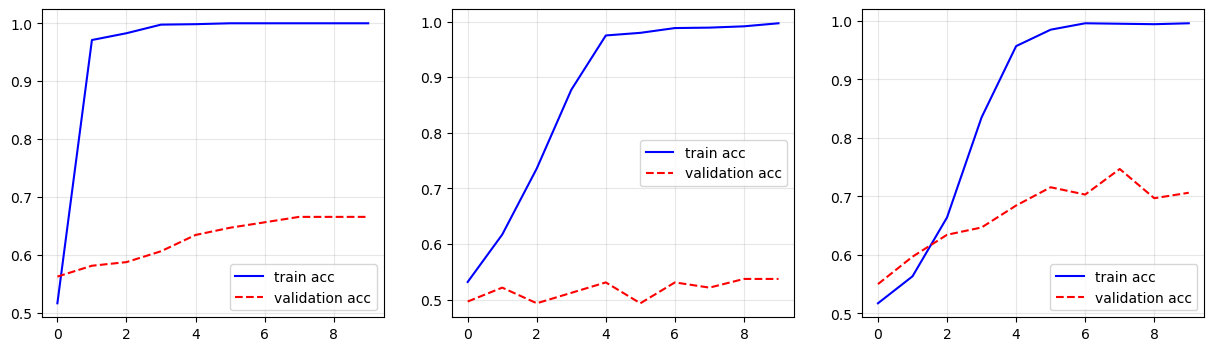

In [51]:
for modelname, acc in sorted(results.items(),key=lambda x : x[1], reverse=True) :
    print(f'{modelname} : {acc:.4f}')
fig, ax = plt.subplots(1,3,figsize=(15,4))
# baseline
ax[0].plot(history.history['acc'],'b-', label='train acc')
ax[0].plot(history.history['val_acc'],'r--', label='validation acc')
ax[0].legend()
ax[0].grid(True,alpha=0.3)
# SimpleRnn
ax[1].plot(history2.history['acc'],'b-', label='train acc')
ax[1].plot(history2.history['val_acc'],'r--', label='validation acc')
ax[1].legend()
ax[1].grid(True,alpha=0.3)
# Bidirection_LSTM
ax[2].plot(history3.history['acc'],'b-', label='train acc')
ax[2].plot(history3.history['val_acc'],'r--', label='validation acc')
ax[2].legend()
ax[2].grid(True,alpha=0.3)


---

kernel_regularizer 설정 -> 과적합  방지를 위해 가중치를 규제

In [56]:
# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 1 baseline(Flatten + Dense)
model1 = Sequential([
    Embedding(max_word,32,input_length = maxlen),
    Flatten(),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history1 = model1.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model1.evaluate(x_test,y_test)
results['baseline'] = score1[1]
print(f'model1 정확도:{score1[1]:.4f}')


# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 2 (SimpleRnn)
model2 = Sequential([
    Embedding(max_word,32,input_length = maxlen),
    SimpleRNN(32),
    Dropout(0.5),
    Dense(32,activation='relu',kernel_regularizer=l2(0.01)),
    Dense(1,activation='sigmoid')
])
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history2 = model2.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model2.evaluate(x_test,y_test)
results['Simple_RNN'] = score1[1]
print(f'model2 정확도:{score1[1]:.4f}')


# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----------model 3 (Bidirectional LSTM)
model3 = Sequential([
    Embedding(max_word,64,input_length = maxlen),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64,activation='relu',kernel_regularizer=l2(0.01)),
    Dense(1,activation='sigmoid')
])
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history3 = model3.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model3.evaluate(x_test,y_test)
results['Bidirectional LSTM'] = score1[1]
print(f'model3 정확도:{score1[1]:.4f}')

Epoch 1/10


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.5273 - loss: 0.6926 - val_acc: 0.5625 - val_loss: 0.6898
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9062 - loss: 0.6203 - val_acc: 0.5875 - val_loss: 0.6844
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9594 - loss: 0.5315 - val_acc: 0.6250 - val_loss: 0.6746
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9875 - loss: 0.4116 - val_acc: 0.6375 - val_loss: 0.6604
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9953 - loss: 0.2858 - val_acc: 0.6219 - val_loss: 0.6457
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9977 - loss: 0.1894 - val_acc: 0.6469 - val_loss: 0.6310
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 1.0000 - loss: 0.1233 - val_acc: 0.6469 - val_loss: 0.6206
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9992 - loss: 0.0819 - val_acc: 0.6594 - val_loss: 0.6137
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 1.0000 - loss: 0.

Bidirectional LSTM : 0.7125


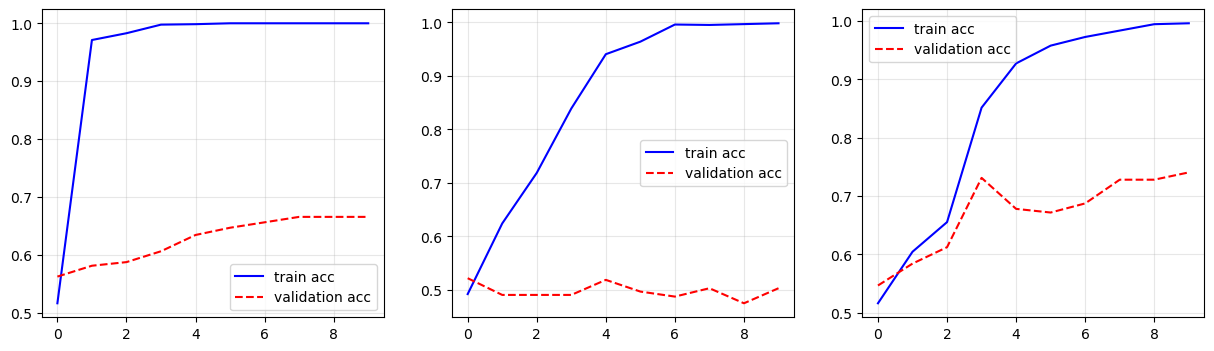

In [57]:
for modelname, acc in sorted(results.items(),key=lambda x : x[1], reverse=True) :
    print(f'{modelname} : {acc:.4f}')
fig, ax = plt.subplots(1,3,figsize=(15,4))
# baseline
ax[0].plot(history.history['acc'],'b-', label='train acc')
ax[0].plot(history.history['val_acc'],'r--', label='validation acc')
ax[0].legend()
ax[0].grid(True,alpha=0.3)
# SimpleRnn
ax[1].plot(history2.history['acc'],'b-', label='train acc')
ax[1].plot(history2.history['val_acc'],'r--', label='validation acc')
ax[1].legend()
ax[1].grid(True,alpha=0.3)
# Bidirection_LSTM
ax[2].plot(history3.history['acc'],'b-', label='train acc')
ax[2].plot(history3.history['val_acc'],'r--', label='validation acc')
ax[2].legend()
ax[2].grid(True,alpha=0.3)


<span style="color: Gold"> 4. 예측 결과 분석

<span style="color: Gold"> 5. 학습 결과 해석